# AI 2024 Online Summer Internship
### Name: Rasikh Ali
### Email: rasikhali1234@gmail.com

<div class="alert alert-block alert-info">
    <h1> Libraries </h1>
</div>

In [1]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ABC\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ABC\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ABC\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<div class="alert alert-block alert-info">
    <h1> Loading Dataset </h1>
</div>

In [7]:
data = pd.read_csv('final_sample_tweets.csv')

print("\n\nSentiment Analysis Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(f'Sample data count = {len(data)}\n')
print(data.head())
print(data.tail())

# sentiment_type
# 1 is positive
# 0 is positive



Sentiment Analysis Data:

Sample data count = 110

      id                        org  sentiment_type  \
0   1637  CallOfDutyBlackopsColdWar               1   
1  12415               WorldOfCraft               1   
2   7993                  MaddenNFL               1   
3   7037            johnson&johnson               1   
4   2155                 CallOfDuty               1   

                                               tweet  
0  Aye I’m gonna keep it here slow war is the mos...  
1  The great result of "Bloody War" is that the d...  
2      Derwin James is the best safety on this list.  
3                Loonngg long overdue, but good job!  
4  i am so excited to come home and play Call of ...  
       id            org  sentiment_type  \
105  6756       Fortnite               0   
106   115         Amazon               0   
107  3635  Cyberpunk2077               0   
108  2957          Dota2               0   
109   523    ApexLegends               0   

                     

<div class="alert alert-block alert-warning">
    <h2> Display columns </h2>
</div>

In [8]:
data.columns

Index(['id', 'org', 'sentiment_type', 'tweet'], dtype='object')

<div class="alert alert-block alert-warning">
    <h2> Keeping required columns in dataset </h2>
</div>

In [9]:
data = data [['sentiment_type', 'tweet']]

print("\n\nSentiment Analysis Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.tail())



Sentiment Analysis Data:

   sentiment_type                                              tweet
0               1  Aye I’m gonna keep it here slow war is the mos...
1               1  The great result of "Bloody War" is that the d...
2               1      Derwin James is the best safety on this list.
3               1                Loonngg long overdue, but good job!
4               1  i am so excited to come home and play Call of ...
     sentiment_type                                              tweet
105               0  god, why won't my lil bro shut up and talk abo...
106               0                       Plague without Corruption is
107               0  i wouldn't see my blog tweet cause i muted all...
108               0          Damn it, We blackout when playing Dota 2.
109               0  The new favourite bloodhound skin for season e...


<div class="alert alert-block alert-info">
    <h1> Understand and Pre-process Sample Data </h1>
</div>

<div class="alert alert-block alert-warning">
    <h2>  Download and set stopwords </h2>
    <p> # Ensure you have downloaded the stopwords
<br>import nltk
<br>nltk.download('stopwords')
<br>from nltk.corpus import stopwords

# Set the stopwords for English
stop_words = set(stopwords.words('english'))</p>
</div>

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words = set(stopwords.words('english'))

<div class="alert alert-block alert-warning">
    <h2> Define function to clean the text </h2>
</div>

In [13]:
# Function to clean the text
def clean_text(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [14]:
def remove_symbols_numbers(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [15]:
def to_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    return text

In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

<div class="alert alert-block alert-warning">
    <h2> Load the Dataset </h2>
</div>

In [18]:
# Load the data
data = pd.read_csv('final_sample_tweets.csv')
data

,id,org,sentiment_type,tweet
0,1637,CallOfDutyBlackopsColdWar,1,Aye I’m gonna keep it here slow war is the mos...
1,12415,WorldOfCraft,1,"The great result of ""Bloody War"" is that the d..."
2,7993,MaddenNFL,1,Derwin James is the best safety on this list.
3,7037,johnson&johnson,1,"Loonngg long overdue, but good job!"
4,2155,CallOfDuty,1,i am so excited to come home and play Call of ...
5,2833,Dota2,1,2 am dota chick and i love the bed boy - Casey
6,6353,FIFA,1,This was easily the best Fifa. First time with...
7,9063,Nvidia,1,AMD really got so scared of Nvidia’s ampere th...
8,7431,LeagueOfLegends,1,"I can't believe I'm saying this, but League of..."
9,4523,Google,1,Might just pay for the extra google drive spac...


<div class="alert alert-block alert-warning">
    <h2> Drop NaN rows </h2>
</div>

In [20]:
# Sample data without Droping Rows with NAN Values
print(len(data))

110


In [23]:
print(data.isna().sum())

id                0
org               0
sentiment_type    0
tweet             4
dtype: int64


In [24]:
# Drop rows with NaN values in the text column
data = data.dropna(subset=['tweet'])

In [25]:
# Sample data After Droping Rows with NAN Values
print(len(data))

106


<div class="alert alert-block alert-warning">
    <h2> Apply Data Cleaning </h2>
</div>

In [26]:
data['tweet']

0      Aye I’m gonna keep it here slow war is the mos...
1      The great result of "Bloody War" is that the d...
2          Derwin James is the best safety on this list.
3                    Loonngg long overdue, but good job!
4      i am so excited to come home and play Call of ...
5         2 am dota chick and i love the bed boy - Casey
6      This was easily the best Fifa. First time with...
7      AMD really got so scared of Nvidia’s ampere th...
8      I can't believe I'm saying this, but League of...
9      Might just pay for the extra google drive spac...
10     boy's head wrap! After 172 hours off streaming...
11     finally hit diamond again playing mostly Ana, ...
12              I think I'm addicted Battlefield 1 again
13                                        Good luck in 3
14     I play with my friend Red Dead Redemption and ...
15                                        Love to see it
16     Wait they still allow Floppy disks?! I thought...
17      MONT OF UNTIL 2077 AND 

In [27]:
data['tweet'] = data['tweet'].apply(remove_symbols_numbers)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4916\2274135493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(remove_symbols_numbers)


In [35]:
# data['tweet']

In [29]:
data['tweet'] = data['tweet'].apply(to_lowercase)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4916\690812295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(to_lowercase)


In [34]:
# data['tweet']

In [31]:
data['tweet'] = data['tweet'].apply(remove_stopwords)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4916\815334386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(remove_stopwords)


In [33]:
# data['tweet']

In [36]:
# Clean the 'tweet' column
data['tweet'] = data['tweet'].apply(clean_text)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4916\808148762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_text)


In [37]:
data['tweet']

0      aye im gonna keep slow war fun ive cod title b...
1      great result bloody war depth warcrafts plot e...
2                          derwin james best safety list
3                          loonngg long overdue good job
4      excited come home play call duty im fucking lo...
5                          dota chick love bed boy casey
6      easily best fifa first time secondary division...
7      amd really got scared nvidias ampere quit maki...
8      cant believe im saying league legends somethin...
9      might pay extra google drive space getting ann...
10     boys head wrap hours streaming hours played pl...
11     finally hit diamond playing mostly ana really ...
12                         think im addicted battlefield
13                                             good luck
14         play friend red dead redemption sooooooo cute
15                                              love see
16     wait still allow floppy disks thought ceased w...
17                             

<div class="alert alert-block alert-warning">
    <h2> Data After Processing </h2>
</div>

In [39]:
print("\n\nSentiment Analysis Data After Preprocessing:")
print("=================================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data.head())
print(data.tail())



Sentiment Analysis Data After Preprocessing:

      id                        org  sentiment_type  \
0   1637  CallOfDutyBlackopsColdWar               1   
1  12415               WorldOfCraft               1   
2   7993                  MaddenNFL               1   
3   7037            johnson&johnson               1   
4   2155                 CallOfDuty               1   

                                               tweet  
0  aye im gonna keep slow war fun ive cod title b...  
1  great result bloody war depth warcrafts plot e...  
2                      derwin james best safety list  
3                      loonngg long overdue good job  
4  excited come home play call duty im fucking lo...  
       id            org  sentiment_type  \
105  6756       Fortnite               0   
106   115         Amazon               0   
107  3635  Cyberpunk2077               0   
108  2957          Dota2               0   
109   523    ApexLegends               0   

                          

In [40]:
data = data[['id', 'org','tweet','sentiment_type']]

In [41]:
data

,id,org,tweet,sentiment_type
0,1637,CallOfDutyBlackopsColdWar,aye im gonna keep slow war fun ive cod title b...,1
1,12415,WorldOfCraft,great result bloody war depth warcrafts plot e...,1
2,7993,MaddenNFL,derwin james best safety list,1
3,7037,johnson&johnson,loonngg long overdue good job,1
4,2155,CallOfDuty,excited come home play call duty im fucking lo...,1
5,2833,Dota2,dota chick love bed boy casey,1
6,6353,FIFA,easily best fifa first time secondary division...,1
7,9063,Nvidia,amd really got scared nvidias ampere quit maki...,1
8,7431,LeagueOfLegends,cant believe im saying league legends somethin...,1
9,4523,Google,might pay extra google drive space getting ann...,1


<div class="alert alert-block alert-warning">
    <h2> Saving Cleaned Data </h2>
</div>

In [42]:
data.to_csv("cleaned_tweets.csv", index=False)

In [43]:
data.columns

Index(['id', 'org', 'tweet', 'sentiment_type'], dtype='object')

<div class="alert alert-block alert-info">
    <h1> Splitting into Training and Testing </h1>
</div>

In [44]:
data = pd.read_csv('cleaned_tweets.csv')
X = data['tweet']
y = data['sentiment_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(len(X_train))
print(len(X_test))

84
22


In [46]:
X_train.head()

62    bro fuck madden english game modes never work ...
26    thieves two year awful lot work could done tow...
22                                                 fuck
31       cyberpunk looks wonderful soooooooo truly good
45    good sony much want review new whats going rig...
Name: tweet, dtype: object

In [47]:
X_test.head()

100    running things tried playing fifa gets boring ...
10     boys head wrap hours streaming hours played pl...
4      excited come home play call duty im fucking lo...
81     epic needs fix asap epicgames fortnitestatus f...
97     playhearthstone cani pass astromancer arwyn cu...
Name: tweet, dtype: object

<div class="alert alert-block alert-warning">
    <h2> Feature Extraction </h2>
</div>

In [48]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)

In [49]:
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=10)

In [50]:
# Transform the training data
X_train_tfidf = vectorizer.transform(X_train)

In [51]:
# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())


TF-IDF Features DataFrame:
   best      cant  console  even     game      good      new  really  see  \
0   0.0  0.775889      0.0   0.0  0.63087  0.000000  0.00000     0.0  0.0   
1   0.0  0.000000      0.0   0.0  0.00000  0.000000  0.00000     0.0  0.0   
2   0.0  0.000000      0.0   0.0  0.00000  0.000000  0.00000     0.0  0.0   
3   0.0  0.000000      0.0   0.0  0.00000  1.000000  0.00000     0.0  0.0   
4   0.0  0.000000      0.0   0.0  0.00000  0.664386  0.74739     0.0  0.0   

   time  
0   0.0  
1   1.0  
2   0.0  
3   0.0  
4   0.0  


In [52]:
# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())

#to do Parameter tuninng we are not clear how many features are optimal 


TF-IDF Features DataFrame:
   best  cant  console  even  game  good  new  really  see  time
0   0.0   1.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0   0.0
1   0.0   0.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0   0.0
2   0.0   0.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0   0.0
3   0.0   0.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0   0.0
4   0.0   0.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0   0.0


<div class="alert alert-block alert-info">
    <h1> Training Phase </h1>
</div>

In [54]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [55]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

<div class="alert alert-block alert-info">
    <h1> Testing Phase </h1>
</div>

In [58]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print(f"Model loaded from 'naive_bayes_model.pkl'")

Model loaded from 'naive_bayes_model.pkl'


In [59]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)

Accuracy: 0.5454545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.67      0.18      0.29        11

    accuracy                           0.55        22
   macro avg       0.60      0.55      0.48        22
weighted avg       0.60      0.55      0.48        22



Confusion Matrix:
[[10  1]
 [ 9  2]]


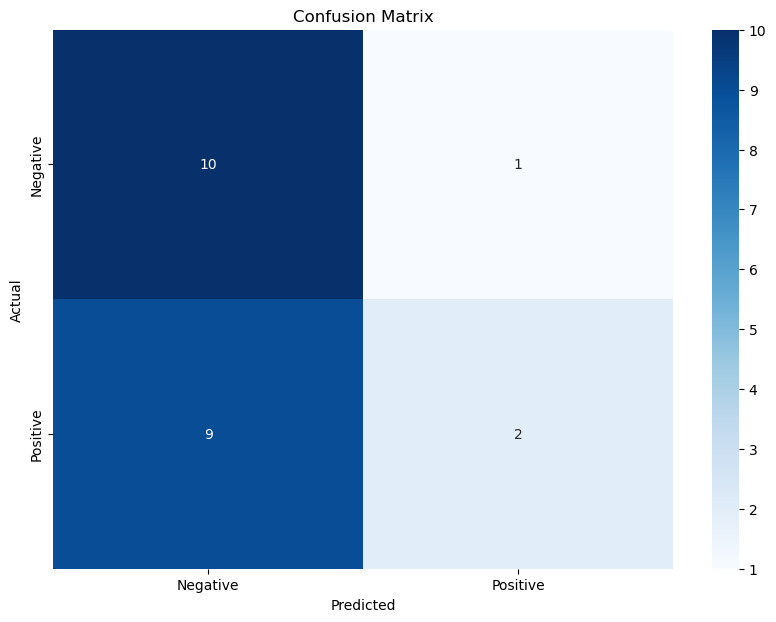

In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-block alert-info">
    <h1> Application Phase </h1>
</div>

In [65]:
# Take user input
user_input = input("Please enter your text: ").strip()

# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_input = preprocess_user_input(user_input)

Please enter your text: If they are successful, we can rest assured that the COVID-19 best vaccine will not irritate our eyes this time


In [66]:
user_input

'If they are successful, we can rest assured that the COVID-19 best vaccine will not irritate our eyes this time'

In [67]:
cleaned_input

'successful rest assured covid best vaccine irritate eyes time'

In [68]:
# Load the vectorizer and the model (ensure these are the same as used during training)
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('naive_bayes_model.pkl')

In [69]:
# Transform the cleaned input using the vectorizer
X_test_tfidf = vectorizer.transform([cleaned_input])  # Wrap the cleaned input in a list

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame for User Input:")
print(X_test_tfidf_df)


TF-IDF Features DataFrame for User Input:
       best  cant  console  even  game  good  new  really  see      time
0  0.707107   0.0      0.0   0.0   0.0   0.0  0.0     0.0  0.0  0.707107


In [70]:
# Transform the user input using the loaded vectorizer
user_input_tfidf = vectorizer.transform([cleaned_input])

In [71]:
# Predict the sentiment of the user input
user_prediction = model.predict(X_test_tfidf_df)

# Output the prediction
sentiment = 'Positive' if user_prediction[0] == 1 else 'Negative'
print(f"The sentiment of  {user_input}  is: {sentiment}")

The sentiment of  If they are successful, we can rest assured that the COVID-19 best vaccine will not irritate our eyes this time  is: Positive


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
